# Project: Yelp Rating Regression Predictor


## Introduction

Using a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for AmokezDelicacies restaurant!

#### Data sources:

The json files analyzed was provided by Codecademy.

## Scoping

- Investigate Data.
    
- Data Cleaning and Wrangling

- Exploratory Analysis/Data Visualization

- Model Training, Evaluation & Prediction 

## Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<br>

## Load and Inspect Data 

There are five json files provided and loaded into businesses, reviews, users, checkins, tips, and photos. 

In [2]:
businesses = pd.read_json('yelp_business.json',lines=True)
reviews = pd.read_json('yelp_review.json',lines=True)
users = pd.read_json('yelp_user.json',lines=True)
checkins = pd.read_json('yelp_checkin.json',lines=True)
tips = pd.read_json('yelp_tip.json',lines=True)
photos = pd.read_json('yelp_photo.json',lines=True)

In [3]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

### Businesses Data

- businesses contain 22 columns and 188,593 rows. 
- Column names include: 'address', 'alcohol?', 'attributes', 'business_id', 'categories', 'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'price_range', 'review_count', 'stars', 'state', 'take_reservations', and 'takes_credit_cards'.
- There are null values in five of the columns: 
    - attributes has 25786 null values
    - categories has 541 null values
    - hours has 44802 null values
    - latitude has 6 null values
    - longitude has 6 null values
- businesses contain data for 188,593 unique business ids

In [4]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [5]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             188593 non-null  object 
 1   alcohol?            188593 non-null  int64  
 2   attributes          162807 non-null  object 
 3   business_id         188593 non-null  object 
 4   categories          188052 non-null  object 
 5   city                188593 non-null  object 
 6   good_for_kids       188593 non-null  int64  
 7   has_bike_parking    188593 non-null  int64  
 8   has_wifi            188593 non-null  int64  
 9   hours               143791 non-null  object 
 10  is_open             188593 non-null  int64  
 11  latitude            188587 non-null  float64
 12  longitude           188587 non-null  float64
 13  name                188593 non-null  object 
 14  neighborhood        188593 non-null  object 
 15  postal_code         188593 non-nul

In [6]:
businesses.isna().sum()

address                   0
alcohol?                  0
attributes            25786
business_id               0
categories              541
city                      0
good_for_kids             0
has_bike_parking          0
has_wifi                  0
hours                 44802
is_open                   0
latitude                  6
longitude                 6
name                      0
neighborhood              0
postal_code               0
price_range               0
review_count              0
stars                     0
state                     0
take_reservations         0
takes_credit_cards        0
dtype: int64

In [7]:
businesses.business_id.nunique()

188593

### Reviews Data

- reviews contain 7 columns and 188,593 rows.
- Column names include 'business_id', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', and 'number_useful_votes'
- There are no null values in all columns
- reviews contain data for 188,593 unique business ids

In [8]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   business_id               188593 non-null  object 
 1   average_review_age        188593 non-null  float64
 2   average_review_length     188593 non-null  float64
 3   average_review_sentiment  188593 non-null  float64
 4   number_funny_votes        188593 non-null  int64  
 5   number_cool_votes         188593 non-null  int64  
 6   number_useful_votes       188593 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 10.1+ MB


In [10]:
reviews.columns

Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')

In [11]:
reviews.business_id.nunique()

188593

### Users Data

- users contain 6 columns and 188,593 rows.
- Column names include 'business_id', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', and 'average_number_years_elite'
- There are no null values in all columns
- users contain data for 188,593 unique business ids

In [12]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 188593 non-null  object 
 1   average_number_friends      188593 non-null  float64
 2   average_days_on_yelp        188593 non-null  float64
 3   average_number_fans         188593 non-null  float64
 4   average_review_count        188593 non-null  float64
 5   average_number_years_elite  188593 non-null  float64
dtypes: float64(5), object(1)
memory usage: 8.6+ MB


In [14]:
users.columns

Index(['business_id', 'average_number_friends', 'average_days_on_yelp',
       'average_number_fans', 'average_review_count',
       'average_number_years_elite'],
      dtype='object')

In [15]:
users.business_id.nunique()

188593

### Checkins Data

- checkins contain 4 columns and 157,075 rows.
- Column names include 'business_id', 'time', 'weekday_checkins', 'weekend_checkins'
- There are no null values in all columns
- checkins contain data for 157,075 unique business ids

In [16]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [17]:
checkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157075 entries, 0 to 157074
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   business_id       157075 non-null  object
 1   time              157075 non-null  object
 2   weekday_checkins  157075 non-null  int64 
 3   weekend_checkins  157075 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.8+ MB


In [18]:
checkins.columns

Index(['business_id', 'time', 'weekday_checkins', 'weekend_checkins'], dtype='object')

In [19]:
checkins.business_id.nunique()

157075

### Tips Data

- tips contain 3 columns and 121526 rows.
- Column names include 'business_id', 'average_tip_length', and 'number_tips'
- There are no null values in all columns
- tips contain data for 121,526 unique business ids

In [20]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [21]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121526 entries, 0 to 121525
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business_id         121526 non-null  object 
 1   average_tip_length  121526 non-null  float64
 2   number_tips         121526 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ MB


In [22]:
tips.business_id.nunique()

121526

### Photos Data

- photos contain 3 columns and 188,593 rows.
- Column names include 'business_id', 'average_caption_length', and 'number_pics'
- There are no null values in all columns
- photos contain data for 32,976 unique business ids

In [23]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


In [24]:
photos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32976 entries, 0 to 32975
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             32976 non-null  object 
 1   average_caption_length  32976 non-null  float64
 2   number_pics             32976 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 773.0+ KB


In [25]:
photos.business_id.nunique()

32976

<br>

## Data Cleaning & Wrangling

**Merge the data**

- all datasets are merged into one dataframe, 'businesses_data', on 'business_id' since all the datasets provide data on businesses 
- businesses_data has 40 columns and 188,593 rows
- There are missing values in some of the columns:
    - attributes has 25,786 null values
    - categories has 541 null values
    - hours has 44,802 null values
    - latitude has 6 null values
    - longitude has 6 null values
    - time has 31,518 null values                          
    - weekday_checkins has 31,518 null values
    - weekend_checkins has 31,518 null values             
    - average_tip_length has 67,067 null values           
    - number_tips has 67,067 null values               
    - average_caption_length has 155,617 null values       
    - number_pics has 155,617 null values

**Clean the Data**

- Drop features we do not want to make predictions on
- Missing Values:
    - ~16.7% of weekday_checkins and weekend_checkins columns are missing but are replaced with 0 based on the assumption that the associated businesses did not display these features on their Yelp pages
    - ~35.6% of average_tip_length and number_tips columns are missing but are replaced with 0 based on the assumption that the associated businesses did not display these features on their Yelp pages
    - ~82.5% of the values in average_caption_length and number_pics columns are missing but are replaced with 0 based on the assumption that the associated businesses did not display these features on their Yelp pages
    
    
**After cleaning, there are 188,593 non-null, non-duplicated rows and 26 columns with numeric data types in businesses_data**

In [26]:
businesses_data = pd.merge(businesses, reviews, how='left', on='business_id')

In [27]:
businesses_data = pd.merge(businesses_data, users, how='left', on='business_id')
businesses_data = pd.merge(businesses_data, checkins, how='left', on='business_id')
businesses_data = pd.merge(businesses_data, tips, how='left', on='business_id')
businesses_data = pd.merge(businesses_data, photos, how='left', on='business_id')

In [28]:
businesses_data.isna().sum()

address                            0
alcohol?                           0
attributes                     25786
business_id                        0
categories                       541
city                               0
good_for_kids                      0
has_bike_parking                   0
has_wifi                           0
hours                          44802
is_open                            0
latitude                           6
longitude                          6
name                               0
neighborhood                       0
postal_code                        0
price_range                        0
review_count                       0
stars                              0
state                              0
take_reservations                  0
takes_credit_cards                 0
average_review_age                 0
average_review_length              0
average_review_sentiment           0
number_funny_votes                 0
number_cool_votes                  0
n

In [29]:
#Clean the Data
##Drop features

features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
businesses_data.drop(labels=features_to_remove, axis =1, inplace=True)

In [30]:
#fill missing values with 0

businesses_data.fillna({'weekday_checkins':0,
           'weekend_checkins':0,
           'average_tip_length':0,
           'number_tips':0,
           'average_caption_length':0,
           'number_pics':0},
          inplace=True)

In [31]:
businesses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   alcohol?                    188593 non-null  int64  
 1   good_for_kids               188593 non-null  int64  
 2   has_bike_parking            188593 non-null  int64  
 3   has_wifi                    188593 non-null  int64  
 4   price_range                 188593 non-null  int64  
 5   review_count                188593 non-null  int64  
 6   stars                       188593 non-null  float64
 7   take_reservations           188593 non-null  int64  
 8   takes_credit_cards          188593 non-null  int64  
 9   average_review_age          188593 non-null  float64
 10  average_review_length       188593 non-null  float64
 11  average_review_sentiment    188593 non-null  float64
 12  number_funny_votes          188593 non-null  int64  
 13  number_cool_vo

<br>

## Exploratory Analysis/Data Visualization

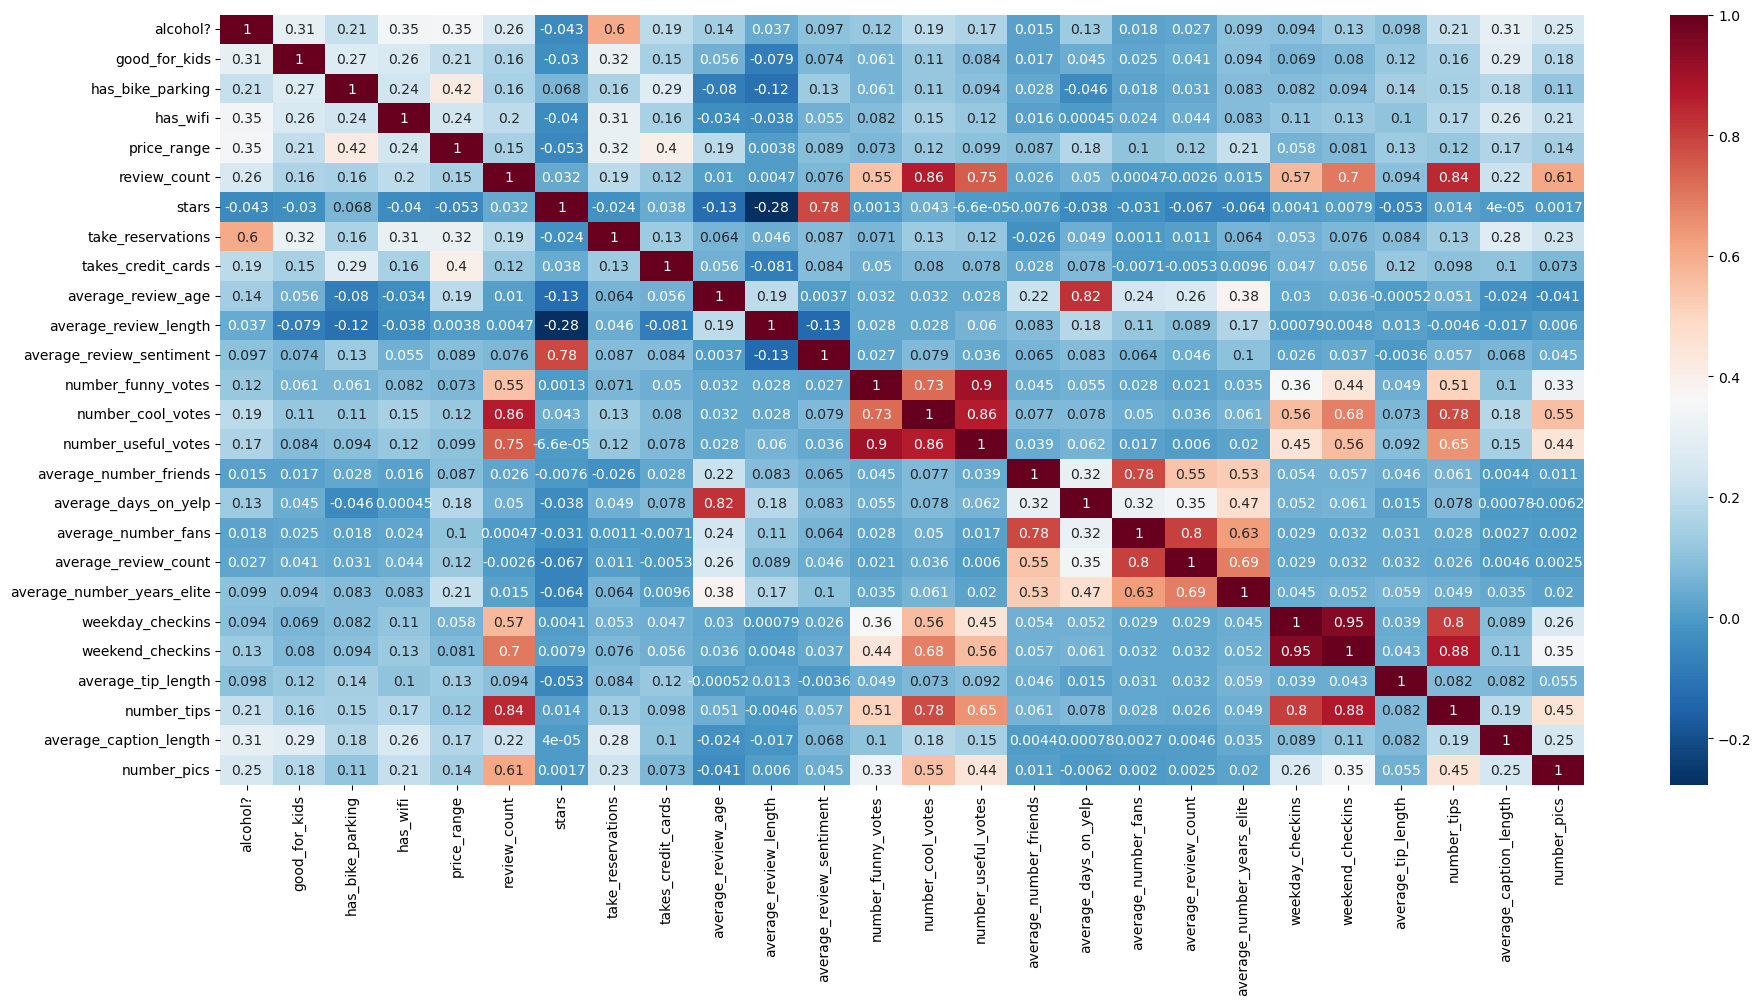

<Figure size 600x600 with 0 Axes>

In [32]:
corr_matrix = businesses_data.corr(method='pearson')
plt.figure(figsize = (22,10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()
plt.clf()

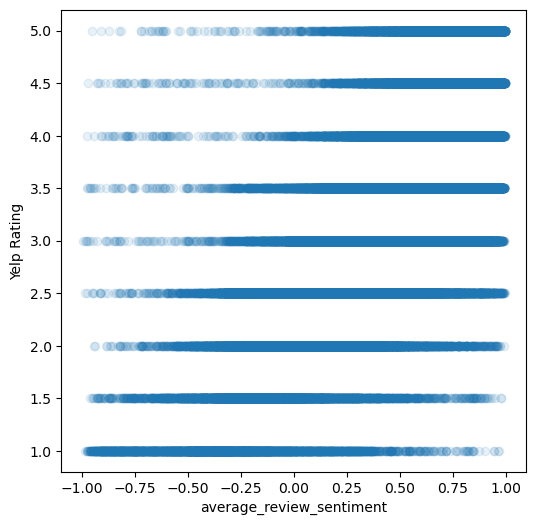

<Figure size 600x600 with 0 Axes>

In [33]:
# plot average_review_sentiment against stars here
plt.scatter(businesses_data['average_review_sentiment'],businesses_data['stars'],alpha=0.1)
plt.xlabel('average_review_sentiment')
plt.ylabel('Yelp Rating')
plt.show()
plt.clf()

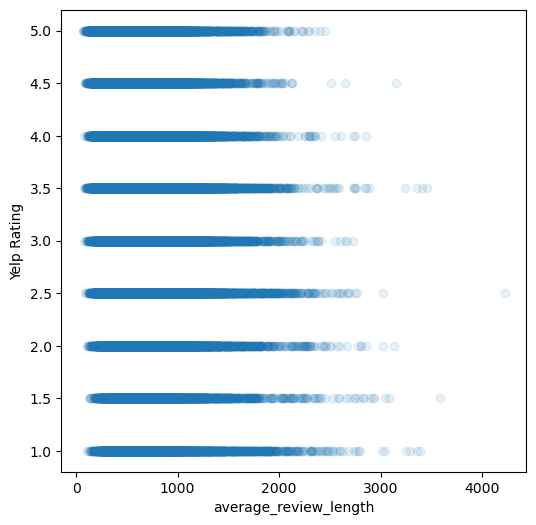

<Figure size 600x600 with 0 Axes>

In [34]:
# plot average_review_length against stars here
plt.scatter(businesses_data['average_review_length'],businesses_data['stars'],alpha=0.1)
plt.xlabel('average_review_length')
plt.ylabel('Yelp Rating')
plt.show()
plt.clf()

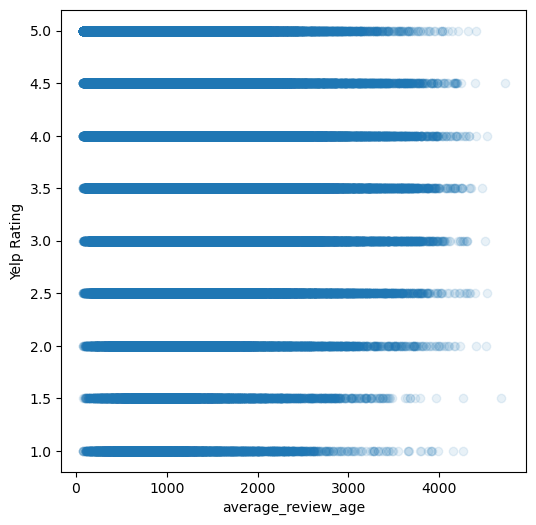

<Figure size 600x600 with 0 Axes>

In [35]:
# plot average_review_age against stars here
plt.scatter(businesses_data['average_review_age'],businesses_data['stars'],alpha=0.1)
plt.xlabel('average_review_age')
plt.ylabel('Yelp Rating')
plt.show()
plt.clf()

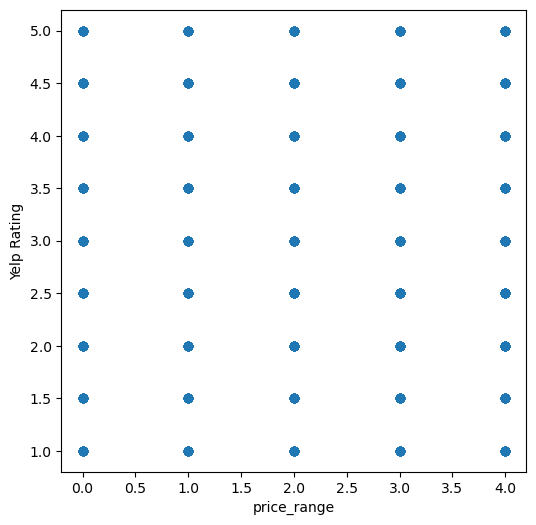

<Figure size 600x600 with 0 Axes>

In [36]:
# plot price_range against stars here
plt.scatter(businesses_data['price_range'],businesses_data['stars'],alpha=0.1)
plt.xlabel('price_range')
plt.ylabel('Yelp Rating')
plt.show()
plt.clf()

<br>

## Modeling

### Data Selection

Selecting 'average_review_length' ,  'average_review_age', and 'price_range' for Multiple Linear Regression

In [37]:
features = businesses_data[['average_review_length', 'average_review_age', 'price_range']]
ratings = businesses_data['stars']

### Split the Data into Training and Testing Sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

### Standardize Data

In [39]:
scaler = StandardScaler()

# fit and transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create and Train the Model

In [40]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Evaluate the Model

Using the `.score()` method, the coefficient of determination showed that about eight percent of the variation in `stars` is explained by the variation in the 'average_review_length', 'average_review_age', and 'price_range' features

In [41]:
print('Training Score:')
model.score(X_train, y_train)

Training Score:


0.0839056239969792

In [42]:
print('Test Score:')
model.score(X_test, y_test)

Test Score:


0.08244894475669928

In [43]:
#print the model features and their corresponding coefficients, from most predictive to least predictive

print('Feature Coefficients:')
sorted(list(zip(['average_review_length','average_review_age', 'price_range'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

Feature Coefficients:


[('average_review_length', -0.26874392895881893),
 ('average_review_age', -0.0690949214565028),
 ('price_range', -0.03880901863959505)]

<br>

## More Modeling

After evaluating the first model, we see that `average_review_length`, `average_review_age` and `price_range` alone are not the best predictors for Yelp rating. Let's do some more modeling on different subsets of data.

In [44]:
#subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [45]:
#subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [46]:
#subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [47]:
#selected features 
selected_features = ['average_review_sentiment', 'average_number_fans', 'average_number_years_elite']

In [48]:
#all features
all_features = binary_features + numeric_features

**In order to more easily compare the performance of these new models, a function called `model_these_features()` is created below to replicate the model building process for the defined subsets of data.**

In [49]:
# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    #Define ratings and features
    ratings = businesses_data.loc[:,'stars']
    features = businesses_data.loc[:,feature_list]
    
    #Split Data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    #standardize data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Allow the model to work when we model on just one feature instead of multiple features.
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    #Create and train the model
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    #print training and test scores
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    #calculate the predicted Yelp ratings for our testing data 
    y_predicted = model.predict(X_test)
    
    #Visualize Predicted Yelp ratings vs actual Yelp ratings!
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

**Run models on the following subsets of data using the function `model_these_features()`**

Train Score: 0.6118980950438655
Test Score: 0.6114021046919491
[('average_review_sentiment', 0.7956557395527855)]


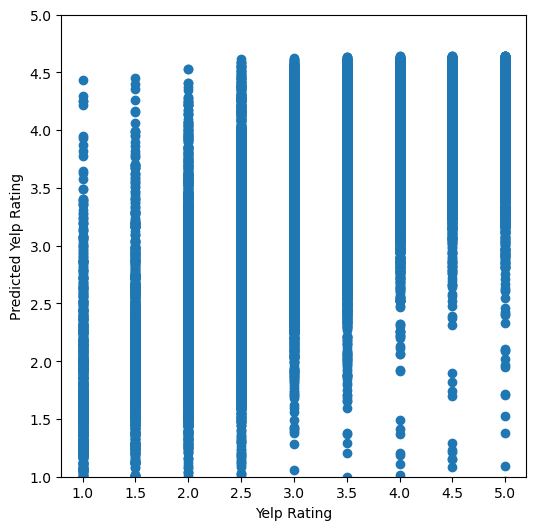

In [50]:
# create a model on sentiment 
model_these_features(sentiment)

Train Score: 0.012223180709591164
Test Score: 0.01011954220226885
[('has_bike_parking', 0.09071509402624595), ('alcohol?', -0.050546072082020894), ('has_wifi', -0.045054183623732945), ('good_for_kids', -0.03869141060508789), ('takes_credit_cards', 0.03285888992795302), ('take_reservations', 0.013898030453093728)]


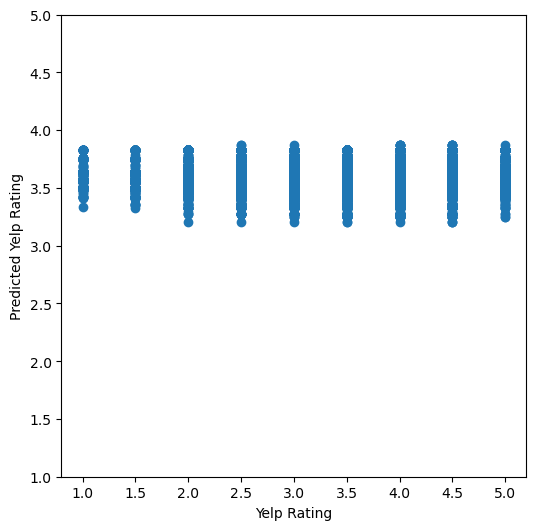

In [51]:
# create a model on all binary features 
model_these_features(binary_features)

Train Score: 0.6734992593766658
Test Score: 0.6713318798120149
[('average_review_sentiment', 0.7848496528975701), ('average_review_length', -0.15585732331242166), ('average_review_age', -0.11167607179585026), ('number_cool_votes', 0.09305315617206604), ('price_range', -0.08358904857382228), ('average_number_years_elite', -0.07976720295096347), ('average_days_on_yelp', 0.0713768569358097), ('average_review_count', -0.04686978100029591), ('number_useful_votes', -0.040770845797324665), ('number_tips', -0.03925748942030072), ('average_caption_length', -0.03433159088798563), ('average_tip_length', -0.028579504369583487), ('average_number_fans', 0.027163651940092272), ('number_pics', -0.025187471852898553), ('weekday_checkins', 0.016707525773330595), ('weekend_checkins', -0.016410745051008653), ('average_number_friends', 0.007838961631513406), ('review_count', -0.0036029736183349525), ('number_funny_votes', -0.0009215675582821894)]


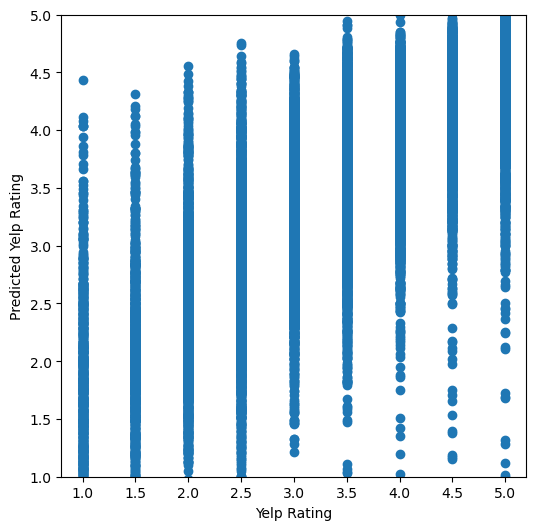

In [52]:
# create a model on all numeric features 
model_these_features(numeric_features)

Train Score: 0.6324330480308111
Test Score: 0.6322802755371048
[('average_review_sentiment', 0.8100729938521238), ('average_number_years_elite', -0.15362107685416593), ('average_number_fans', 0.011918540936527028)]


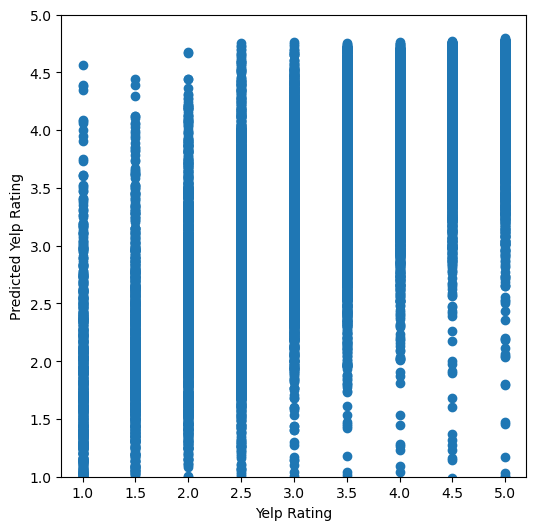

In [53]:
# create a model on selected features 
model_these_features(selected_features)

Train Score: 0.6807828861895335
Test Score: 0.6782129045869247
[('average_review_sentiment', 0.7878680151873944), ('average_review_length', -0.15807179263530718), ('average_review_age', -0.10406374394167095), ('number_cool_votes', 0.07889404256728157), ('average_number_years_elite', -0.06965618139749756), ('average_days_on_yelp', 0.0683180548577424), ('price_range', -0.06738927983830091), ('good_for_kids', -0.05292345642519512), ('alcohol?', -0.05208099782622979), ('average_review_count', -0.04888955015670595), ('number_useful_votes', -0.04770577815058606), ('has_wifi', -0.04152834839217637), ('weekend_checkins', -0.02747810163651425), ('average_number_fans', 0.02653663582641439), ('average_tip_length', -0.022582169851773394), ('number_tips', -0.021031501973265213), ('weekday_checkins', 0.01737183280033469), ('has_bike_parking', 0.013030816832331054), ('takes_credit_cards', 0.011197215001868916), ('number_pics', -0.011188979381672619), ('review_count', 0.010459128340743182), ('average_

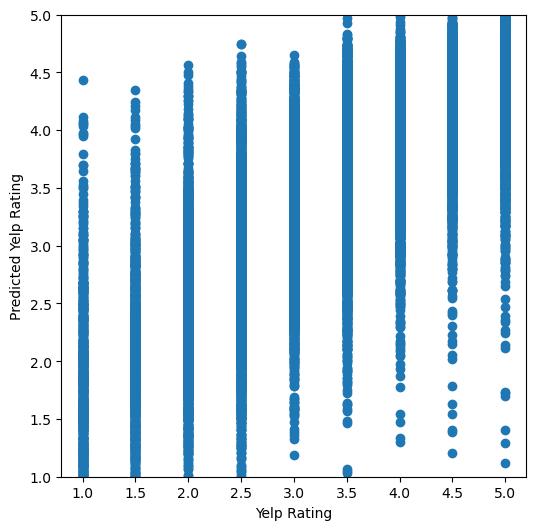

In [54]:
# create a model on all features 
model_these_features(all_features)

<br>

**The best model was the model using all features, so we'll move forward with it!.**

In [55]:
features = businesses_data.loc[:, all_features]
ratings = businesses_data.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [56]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

print('R^2: %.2f' % r2_score(y_test, pred_test))
print('MSE: %.2f' % mean_squared_error(y_test, pred_test, squared=False))

R^2: 0.68
MSE: 0.58


**Test model with new data to predict Yelp rating**:

Let's try it out with AmokezDelicacies, shall we?: Amoke is one of my names!

In [57]:
features.columns

Index(['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids',
       'take_reservations', 'has_wifi', 'review_count', 'price_range',
       'average_caption_length', 'number_pics', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_tip_length', 'number_tips', 'average_number_friends',
       'average_days_on_yelp', 'average_number_fans', 'average_review_count',
       'average_number_years_elite', 'weekday_checkins', 'weekend_checkins'],
      dtype='object')

In [58]:
AmokezDelicacies = np.array([0,1,1,1,1,1,10,2,3,10,10,1200,0.9,3,6,5,50,3,50,1800,12,123,0.5,0,0]).reshape(1,-1)

In [59]:
scaler = StandardScaler()

# fit and transform data
AmokezDelicacies = scaler.fit_transform(AmokezDelicacies)

In [60]:
model.predict(AmokezDelicacies)

array([2.85582049])